In [543]:
# Import required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [544]:
import warnings
warnings.filterwarnings('ignore')

In [545]:
# Load Dataset
df= pd.read_csv('titanic_train.csv')

In [546]:
# Top 5 records
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [547]:
# Last 5 records
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [548]:
df.shape

(891, 12)

In [549]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [550]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [551]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [552]:
#  891 Rows and 12 Columns
# Age column have missing values
# out of 12, 7 are having integer values while 5 have categorical columns

In [553]:
# Lets analyse the data
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [554]:
df['PassengerId'].nunique()

891

In [555]:
# This column has nothing to provide any input to my model. We can choose to drop this

In [556]:
df['Survived'].unique()

array([0, 1], dtype=int64)

In [557]:
# This is out Target column

In [558]:
df['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [559]:
# This seems to be class, like 1st class, 2nd class, 3rd class.  This is categorical/ ordinal column

In [560]:
df['Name'].nunique()  # name of passengers

891

In [561]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

In [562]:
df['Age'].nunique()

88

In [563]:
df['SibSp'].unique()  #  Ordinal

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [564]:
df['Parch'].unique()  #  parent or children

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [565]:
df['Embarked'].unique()  # Embarked si alphabet for station where traveler boarded.,  It also have NaN values

array(['S', 'C', 'Q', nan], dtype=object)

In [566]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [567]:
df['Fare'].unique()

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

# Null Values()

In [568]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

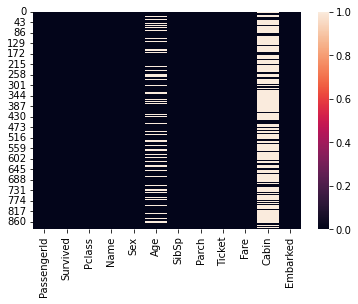

In [569]:
sns.heatmap(df.isnull())

In [570]:
#conclusion:  Age, Cabin, Embarked have null values

In [571]:
df.shape# Rows 891 and column 12

(891, 12)

In [572]:
df['Cabin'].isnull().sum()

687

In [573]:
891-687

204

In [574]:
687/891

0.7710437710437711

In [575]:
# Cabin column  77% data is missing, so filling Null vales will be impractical and it will create bias
# We will delete this

In [576]:
177/891

0.19865319865319866

In [577]:
# Age column have 19% missing values, We will handle it

<AxesSubplot:xlabel='Sex', ylabel='count'>

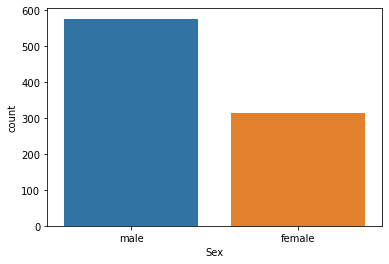

In [578]:
sns.countplot(df['Sex'])

In [579]:
# COnclusion: Male are much higher in count

In [580]:
df['Sex'].value_counts().index

Index(['male', 'female'], dtype='object')

In [581]:
df['Sex'].value_counts().values

array([577, 314], dtype=int64)

([<matplotlib.patches.Wedge at 0x177a1770130>,
 [Text(-0.4919454136803954, 0.9838646807152012, 'male'),
  Text(0.4919455057964525, -0.9838646346559433, 'female')],
 [Text(-0.2683338620074884, 0.5366534622082915, '64.76%'),
  Text(0.26833391225261044, -0.53665343708506, '35.24%')])

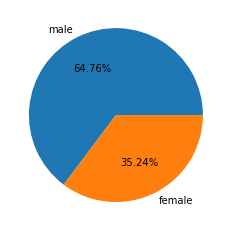

In [582]:
plt.pie(df['Sex'].value_counts().values,labels=df['Sex'].value_counts().index,autopct='%1.2f%%'  )

In [583]:
# 64.76%  are Male on Titanic  while 35.24% were Females

In [584]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Sex', ylabel='count'>

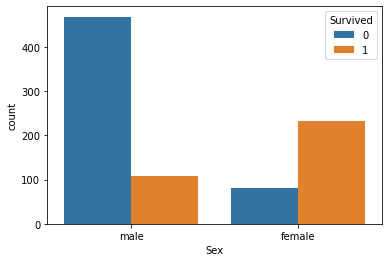

In [585]:
sns.countplot(df['Sex'], hue=df['Survived'])

In [586]:
# More Female survived than Male. Logically first Older,Female,Childs have been asked to evacuate

<AxesSubplot:xlabel='Age', ylabel='Density'>

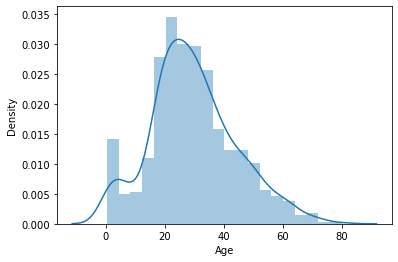

In [587]:
# Lets check age distrubution
sns.distplot(df['Age'])

In [588]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [589]:
df['Age'].value_counts().sort_values(ascending=False)

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
66.00     1
0.67      1
0.42      1
34.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='count'>

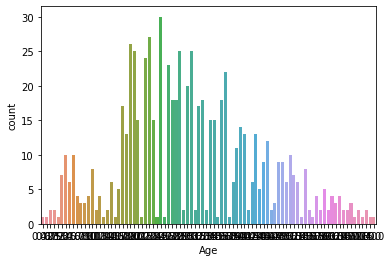

In [590]:
sns.countplot(df['Age'])

In [591]:
# More were young on that ship.

In [592]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

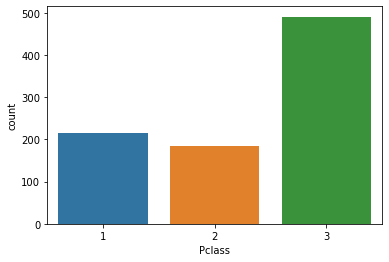

In [593]:
# any relation between Pclass and survived

sns.countplot(df['Pclass'])

([<matplotlib.patches.Wedge at 0x177a1ad6eb0>,
 [Text(-0.17571616709359641, 1.0858746836637898, '3'),
  Text(-0.5160762002061153, -0.9714243951954356, '1'),
  Text(0.8765111456658484, -0.6646263698677192, '2')],
 [Text(-0.09584518205105258, 0.5922952819984307, '55.11%'),
  Text(-0.2814961092033356, -0.5298678519247829, '24.24%'),
  Text(0.47809698854500815, -0.3625234744733013, '20.65%')])

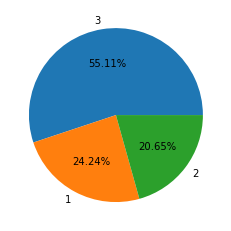

In [594]:
plt.pie(df['Pclass'].value_counts().values, labels=df['Pclass'].value_counts().index, autopct='%1.2f%%')

In [595]:
# conclusion:  55.11% travelers are in Pclass 3, 20.65% were in Pclass 2, while 24.24% were in Pclass 1

<AxesSubplot:xlabel='Pclass', ylabel='count'>

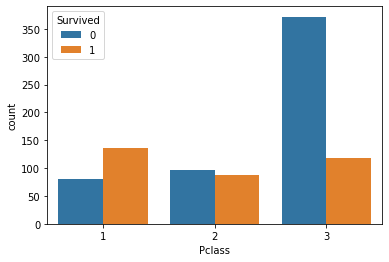

In [596]:


sns.countplot(df['Pclass'],hue=df['Survived'])

In [597]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [598]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [599]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

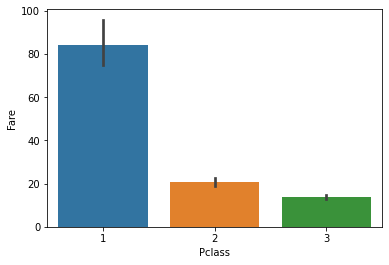

In [603]:
sns.barplot(df['Pclass'],df['Fare'])

In [ ]:
# Plass have high fare,thanPclass 2, and Pclass 3 is cheapest

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

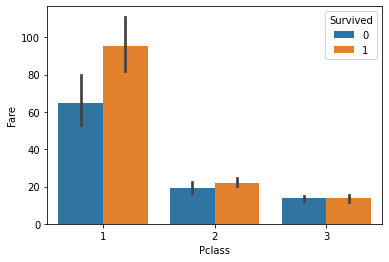

In [605]:
sns.barplot(df['Pclass'],df['Fare'], hue=df['Survived'])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

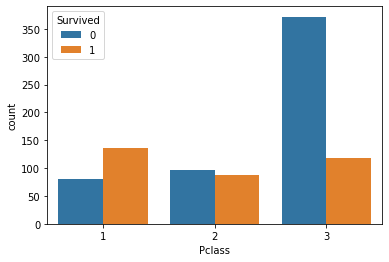

In [607]:
# Most of the survivals are from Pclass 1,
sns.countplot(df['Pclass'],hue=df['Survived'])

In [608]:
# In counts, most peoples are in Pclass 3 with low fares and died more

<AxesSubplot:xlabel='Sex', ylabel='Age'>

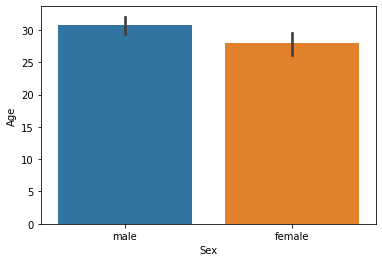

In [609]:
sns.barplot(df['Sex'],df['Age'])

In [610]:
# Male and Females ages are not so much different

<AxesSubplot:xlabel='Sex', ylabel='SibSp'>

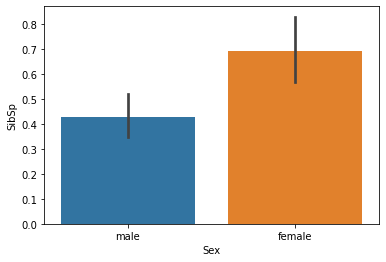

In [611]:
sns.barplot(df['Sex'],df['SibSp'])

In [ ]:
# FEmales have more siblings

In [612]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


<AxesSubplot:xlabel='Age', ylabel='Count'>

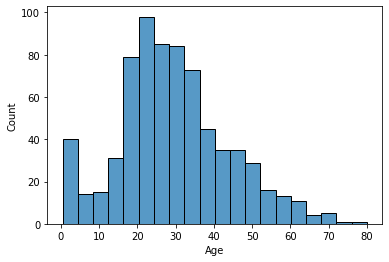

In [616]:
sns.histplot(df['Age'])

In [614]:
# Age looks have normal distribution except have infants baby less than 5 yr olds

<AxesSubplot:xlabel='Fare', ylabel='Count'>

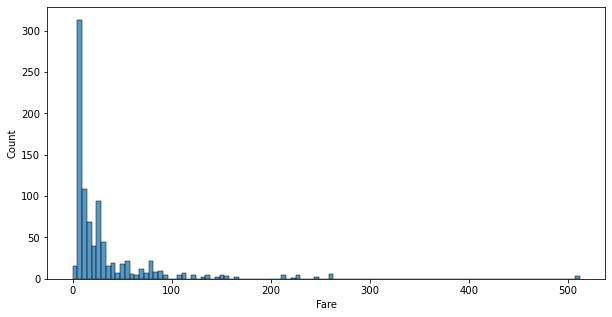

In [618]:
plt.figure(figsize=(10,5))
sns.histplot(df['Fare'])

In [ ]:
# Data is right skewed, however Pclass 3 have less fare with more travelers.

In [619]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [626]:
df.groupby('Survived')['Survived'].count()

Survived
0    549
1    342
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Survival Rate')

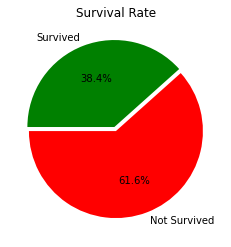

In [637]:
plt.pie(df.groupby('Survived')['Survived'].count().values,labels=['Not Survived','Survived'],autopct='%1.1f%%', startangle=180,colors=['Red','Green'],explode=[0,.05] )
plt.title('Survival Rate')

In [ ]:
# 61.6% peoples are not survived, 38.4% survived only

In [639]:
df.groupby('Pclass')['Pclass'].count()

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

([<matplotlib.patches.Wedge at 0x177a6b001c0>,
 [Text(0.8105821051351225, 0.7728885112580683, 'Pclass 1'),
  Text(-0.6334797587300933, 0.9236359646956495, 'Pclass 2'),
  Text(-0.1789109029798832, -1.1056178764812565, 'Pclass 3')],
 [Text(0.44871509391408565, 0.42784899730357356, '24.2%'),
  Text(-0.3506762950113016, 0.5112984804565202, '20.7%'),
  Text(-0.09903996414957819, -0.6120384673378384, '55.1%')])

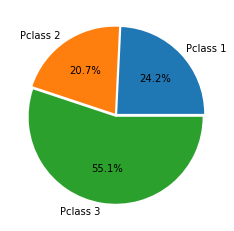

In [646]:
plt.pie(df.groupby('Pclass')['Pclass'].count().values, labels=['Pclass 1','Pclass 2','Pclass 3'], autopct='%1.1f%%',explode=[.02,.02,.02])

In [ ]:
# Pclass 1 had 24.2% travelers, fare was high
# Pclass 2 had 20.7% travelers, fare was inbetween high and low
# Pclass 3 had 55.1% travelers, fare was low

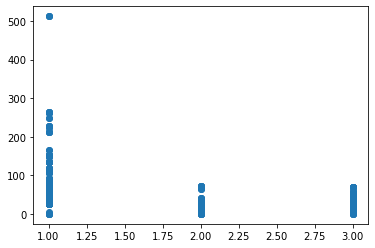

In [650]:
plt.scatter(df['Pclass'],df['Fare'])

<AxesSubplot:xlabel='SibSp', ylabel='count'>

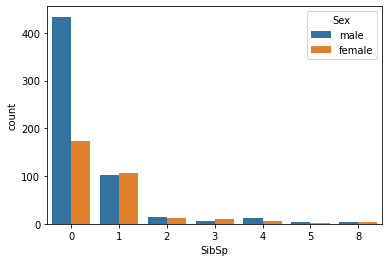

In [653]:
sns.countplot(df['SibSp'],hue=df['Sex'])

In [ ]:
# Sibblings/ spouse  with male or female


In [654]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


Text(0, 0.5, 'Fare')

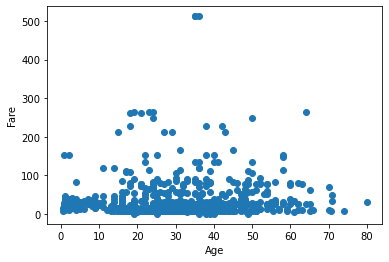

In [659]:
plt.scatter(df['Age'],df['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')

In [660]:
# between age 20 to 67 peoples had got high fare ticket like for Pclass 1

# Lets see data distribution:

<AxesSubplot:xlabel='Age', ylabel='Density'>

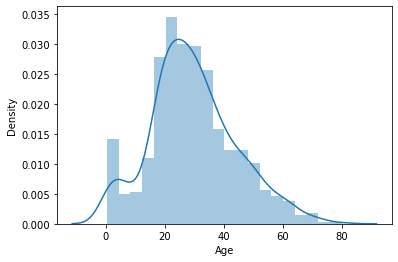

In [382]:
sns.distplot(df['Age'])

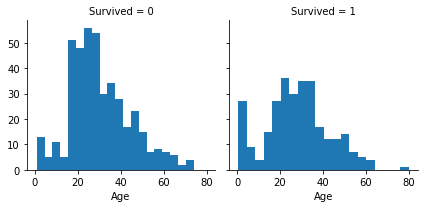

In [383]:
sns.FacetGrid(df,col='Survived').map(plt.hist,'Age',bins=20)

In [384]:
# Not survived numbers are high

In [385]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Age', ylabel='Pclass'>

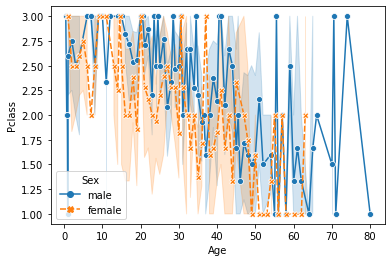

In [386]:
sns.lineplot(x='Age',y='Pclass',hue='Sex',style='Sex',markers=True, data=df)

<AxesSubplot:xlabel='Survived', ylabel='Age'>

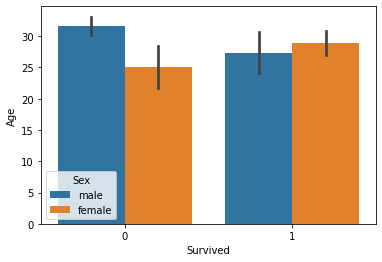

In [387]:
sns.barplot(x='Survived',y='Age',hue='Sex', data=df)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

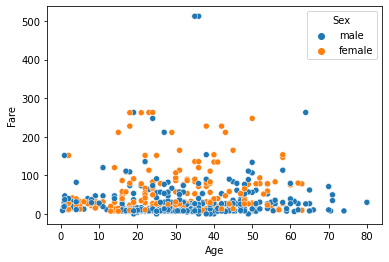

In [388]:
sns.scatterplot(x='Age',y='Fare',hue='Sex', data=df)

In [389]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

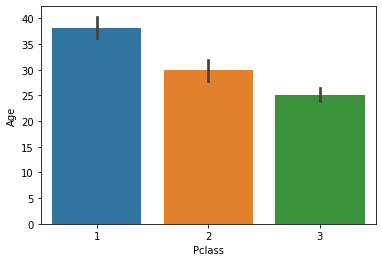

In [390]:
sns.barplot(x='Pclass',y='Age',data=df) # having more age peroples in class 1

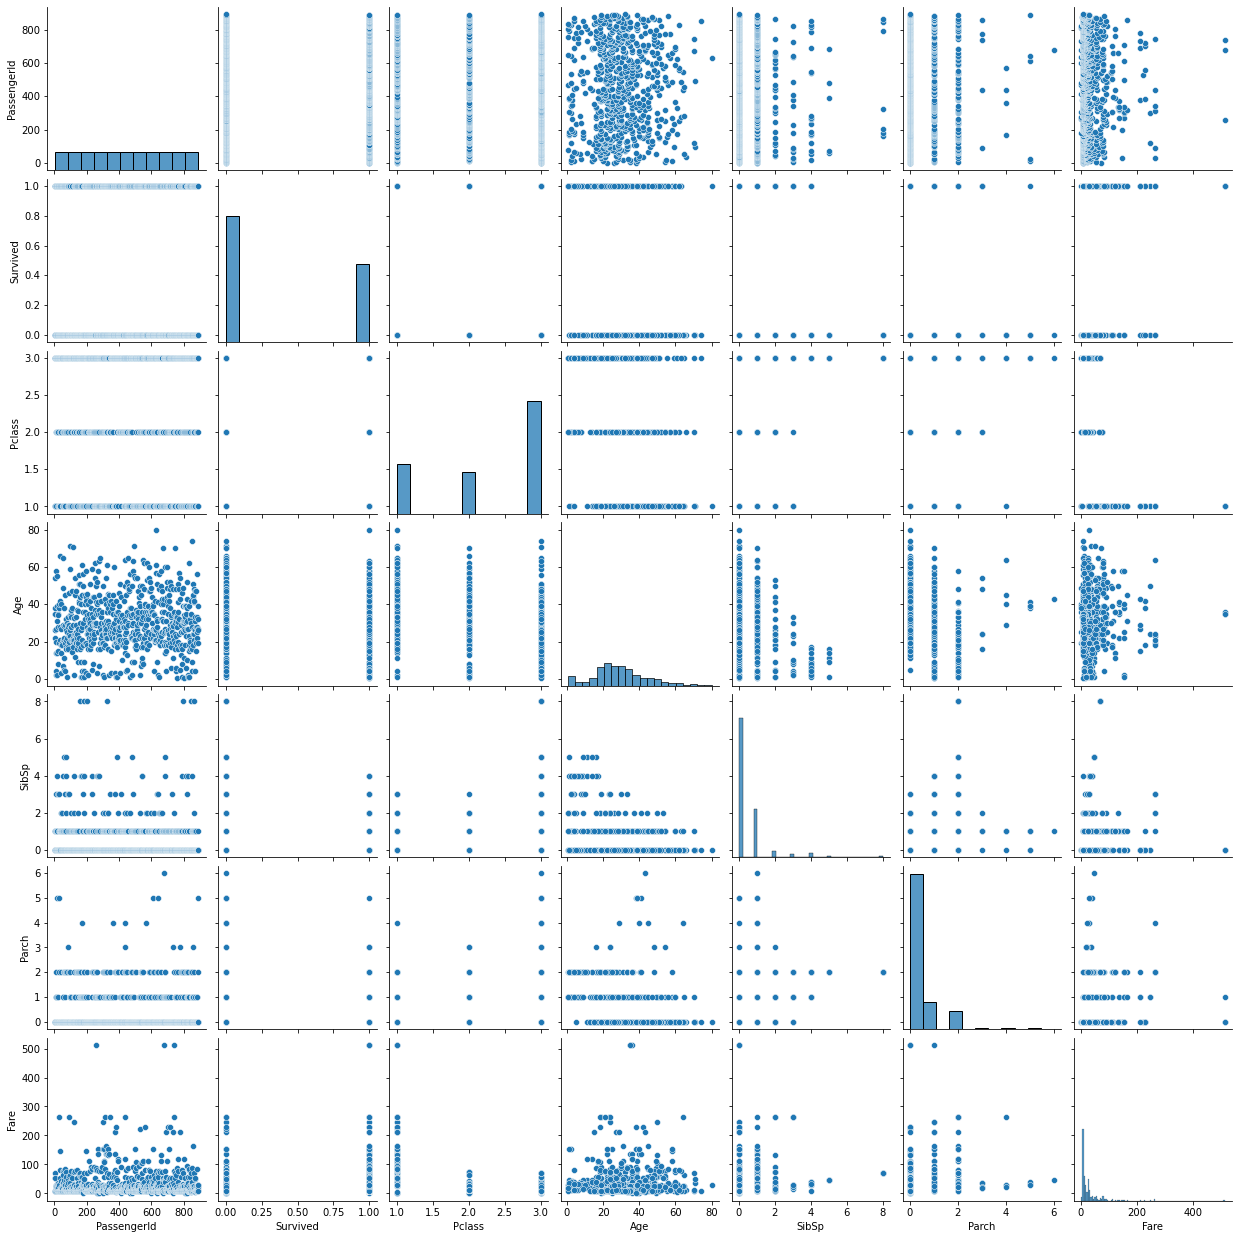

In [661]:
sns.pairplot(df)

In [392]:
#conclusion:
#Pclass vs Survived:  Peoples died from all Pclass
#Age vs Survived: People died of all age

# Check target  balanced of imbalanced

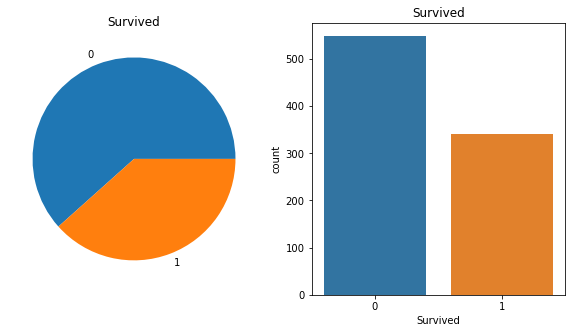

In [674]:
f,ax= plt.subplots(1,2,figsize=(10,5))
df['Survived'].value_counts().plot.pie(ax=ax[0])
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data=df,ax=ax[1])
ax[1].set_title('Survived')
plt.show()


In [393]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [394]:
# Cabin column  77% data is missing, so filling Null vales will be impractical and it will create bias
df.drop('Cabin',axis=1, inplace=True)

In [395]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [396]:
# Passenger ID is not provoding any details about survival so making this index instead
df=df.set_index('PassengerId')

In [397]:
# Although we have Sex and Age to describe about Passanger so we dnt require Name here.

In [398]:
# NAme doesnot matter about survival, age, gender does. so we can drop this column as well.

In [399]:
df.drop('Name', axis=1,inplace=True)

In [400]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,female,38.0,1,0,PC 17599,71.2833,C
3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,female,35.0,1,0,113803,53.1000,S
5,0,3,male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,211536,13.0000,S
888,1,1,female,19.0,0,0,112053,30.0000,S
889,0,3,female,NaN,1,2,W./C. 6607,23.4500,S


In [401]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Embarked     object
dtype: object

In [402]:
# df['Survived'] is Target variable.

In [403]:
#Seprate dependent and Independent variables

X= df.drop('Survived', axis=1)
Y= df['Survived']

In [404]:
Y= pd.DataFrame(Y)

In [405]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,
1,3,male,22.0,1,0,A/5 21171,7.2500,S
2,1,female,38.0,1,0,PC 17599,71.2833,C
3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,female,35.0,1,0,113803,53.1000,S
5,3,male,35.0,0,0,373450,8.0500,S


In [406]:
X['Parch'].unique()  # means parent and childen

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [407]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

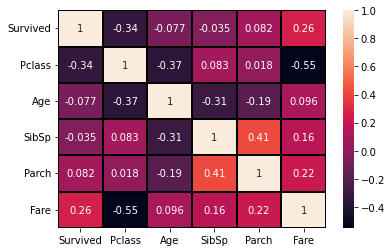

In [408]:
sns.heatmap(df.corr(),annot=True, linecolor='black', linewidths=.25)

In [409]:
#Correlation:  
# Survived with Pclass= -.34
# Survived with Age = -.077
# Survived with SibSp  = -.035
# Survived with Parch = .082
# Survived with Fare  = .26

# Few are negatively low correlated and few positively low correlated

# Handle missing values()

In [410]:
X.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      2
dtype: int64

In [411]:
X['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [412]:
X['Embarked'].mode()

0    S
dtype: object

In [413]:
X[X['Embarked'].isna()]

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,
62,1,female,38.0,0,0,113572,80.0,NaN
830,1,female,62.0,0,0,113572,80.0,NaN


In [414]:
X['Embarked'].fillna('S', inplace=True)

In [415]:
X.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
dtype: int64

In [416]:
X.iloc[62,]  # NaN filled with 'S'

Pclass           1
Sex           male
Age           45.0
SibSp            1
Parch            0
Ticket       36973
Fare        83.475
Embarked         S
Name: 63, dtype: object

In [417]:
X['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [418]:
# Handle Missing values in Age

#Instead of putting Mean or mode for the column, will take median

In [419]:
X.groupby('Sex')['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [420]:
X.groupby('Sex')['Age'].median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [421]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,
1,3,male,22.0,1,0,A/5 21171,7.2500,S
2,1,female,38.0,1,0,PC 17599,71.2833,C
3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,female,35.0,1,0,113803,53.1000,S
5,3,male,35.0,0,0,373450,8.0500,S


In [422]:
# we have mean age for men = 30.72  and for women is 27.915,lets impute this with Median instead

In [423]:
X.groupby('Sex')['Age']

In [424]:
# X[X['Sex']=='male'].fillna('29', inplace=True)
    

In [425]:
# X[X['Sex']=='female'].fillna('27', inplace=True)

In [426]:
X.isnull().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Embarked      0
dtype: int64

In [427]:
X['Age']= X['Age'].fillna(X.groupby('Sex')['Age'].transform('median'))

In [428]:
X.iloc[5]

Pclass           3
Sex           male
Age           29.0
SibSp            0
Parch            0
Ticket      330877
Fare        8.4583
Embarked         Q
Name: 6, dtype: object

In [429]:
X.iloc[19]

Pclass           3
Sex         female
Age           27.0
SibSp            0
Parch            0
Ticket        2649
Fare         7.225
Embarked         C
Name: 20, dtype: object

In [430]:
X.isnull().sum()

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [431]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,
1,3,male,22.0,1,0,A/5 21171,7.2500,S
2,1,female,38.0,1,0,PC 17599,71.2833,C
3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,female,35.0,1,0,113803,53.1000,S
5,3,male,35.0,0,0,373450,8.0500,S


In [432]:
X.shape

(891, 8)

In [433]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked'],
      dtype='object')

# VIF()

In [434]:
# Although, VIF is not necessary here because its for classification problem, lets try to find out|

In [435]:
num=X.select_dtypes(np.number)

In [436]:
from sklearn.preprocessing import MinMaxScaler
mms= MinMaxScaler()
num_scaled=mms.fit_transform(num)


In [437]:
num_scaled= pd.DataFrame(num_scaled)
num_scaled.columns= num.columns

In [438]:
num_scaled


,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.271174,0.125,0.000000,0.014151
1,0.0,0.472229,0.125,0.000000,0.139136
2,1.0,0.321438,0.000,0.000000,0.015469
3,0.0,0.434531,0.125,0.000000,0.103644
4,1.0,0.434531,0.000,0.000000,0.015713
...,...,...,...,...,...
886,0.5,0.334004,0.000,0.000000,0.025374
887,0.0,0.233476,0.000,0.000000,0.058556
888,1.0,0.334004,0.125,0.333333,0.045771
889,0.0,0.321438,0.000,0.000000,0.058556


In [439]:
num_scaled.values

array([[1.        , 0.27117366, 0.125     , 0.        , 0.01415106],
       [0.        , 0.4722292 , 0.125     , 0.        , 0.13913574],
       [1.        , 0.32143755, 0.        , 0.        , 0.01546857],
       ...,
       [1.        , 0.33400352, 0.125     , 0.33333333, 0.04577135],
       [0.        , 0.32143755, 0.        , 0.        , 0.0585561 ],
       [1.        , 0.39683338, 0.        , 0.        , 0.01512699]])

In [440]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [441]:
vif=pd.DataFrame()
vif['VIF Factor']= [variance_inflation_factor(num_scaled.values,i) for i in range(num_scaled.shape[1])]
vif['features']= num_scaled.columns
vif

,VIF Factor,features
0,2.458187,Pclass
1,2.824767,Age
2,1.548457,SibSp
3,1.540763,Parch
4,1.780564,Fare


In [442]:
# All VIF values are below 5, means no multicolinearity porblem

In [443]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,
1,3,male,22.0,1,0,A/5 21171,7.2500,S
2,1,female,38.0,1,0,PC 17599,71.2833,C
3,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,female,35.0,1,0,113803,53.1000,S
5,3,male,35.0,0,0,373450,8.0500,S


In [444]:
X['Ticket'].nunique()

681

In [445]:
X['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [446]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked'], dtype='object')

In [447]:
X.drop('Ticket',axis=1, inplace=True)

In [448]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22.0,1,0,7.2500,S
2,1,female,38.0,1,0,71.2833,C
3,3,female,26.0,0,0,7.9250,S
4,1,female,35.0,1,0,53.1000,S
5,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
887,2,male,27.0,0,0,13.0000,S
888,1,female,19.0,0,0,30.0000,S
889,3,female,27.0,1,2,23.4500,S


In [449]:
#Ticket is dropped because it may not be correlated with survival
#Cabin is dropped because it have more tha 50% null values
#PassengerID is dropped because it donot contribute to Survival
#name feature is dropped because not directly contributing to survival however we have age and sex column in support

In [450]:
X.SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [451]:
X.Parch.unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [452]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22.0,1,0,7.2500,S
2,1,female,38.0,1,0,71.2833,C
3,3,female,26.0,0,0,7.9250,S
4,1,female,35.0,1,0,53.1000,S
5,3,male,35.0,0,0,8.0500,S


# outliers()

In [453]:
X.skew()

Pclass   -0.630548
Age       0.491821
SibSp     3.695352
Parch     2.749117
Fare      4.787317
dtype: float64

<AxesSubplot:xlabel='Pclass'>

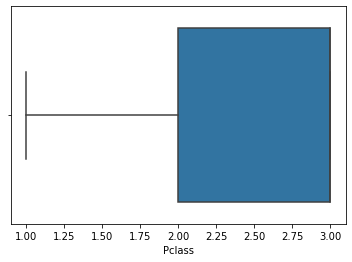

In [454]:
sns.boxplot(X['Pclass'])

<AxesSubplot:xlabel='Pclass', ylabel='count'>

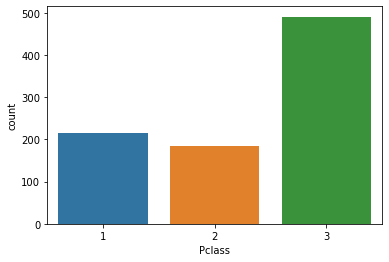

In [455]:
sns.countplot(X['Pclass'])

<AxesSubplot:xlabel='Age'>

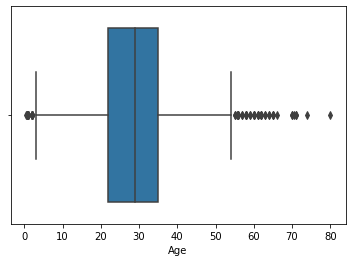

In [456]:
sns.boxplot(X['Age'])

<AxesSubplot:xlabel='Age', ylabel='count'>

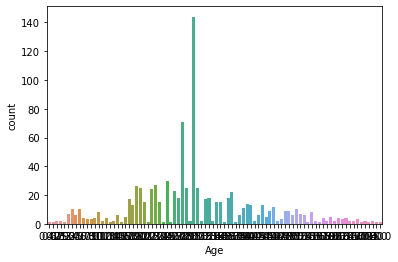

In [457]:
sns.countplot(X['Age'])

In [458]:
X['Age'].max()  # 80 yr is seems to be valid age, chances of this data to be true

80.0

<AxesSubplot:xlabel='Fare'>

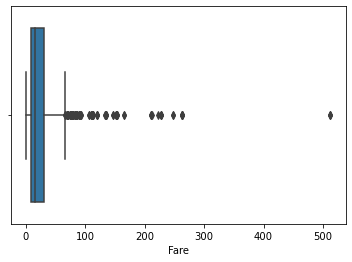

In [459]:
sns.boxplot(X['Fare'])

sns.dis

<AxesSubplot:xlabel='SibSp'>

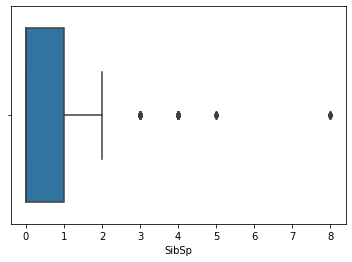

In [460]:
sns.boxplot(X['SibSp'])

<AxesSubplot:xlabel='SibSp', ylabel='count'>

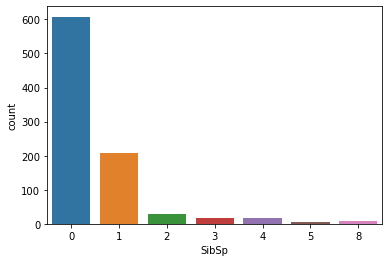

In [461]:
sns.countplot(X['SibSp'])  # this also seems to be valid data, higher the siblings, less the chance, no need to intervene in this data

<AxesSubplot:xlabel='Parch'>

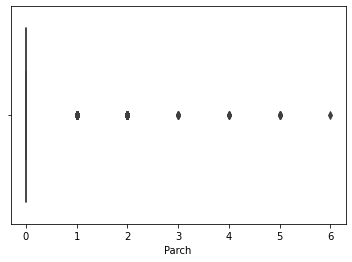

In [462]:
sns.boxplot(X['Parch'])

<AxesSubplot:xlabel='Parch', ylabel='count'>

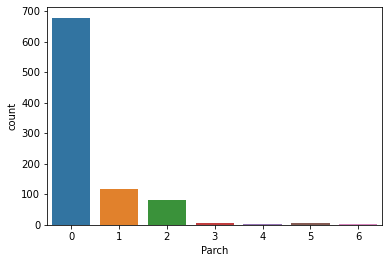

In [463]:
sns.countplot(X['Parch'])  #  This outlier seems to be valid, very few will have parent and child 6, No need to intervent this data

<AxesSubplot:xlabel='Fare'>

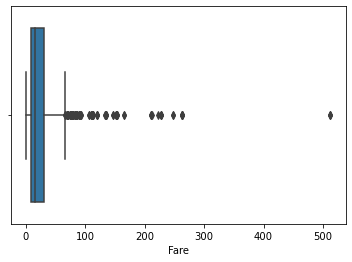

In [464]:
sns.boxplot(X['Fare'])

In [465]:
X['Fare'].min()

0.0

In [466]:
X['Fare'].max()

512.3292

In [467]:
# fare column ahve outliers, no way to be the 0 fare and also, a big difference between 75 percentile and maximum

X['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [468]:
# 75% -->  31
# max -->  512
# lets handle outliers in Fare column

In [469]:
Q1= X['Fare'].quantile(.25)
Q1

7.9104

In [470]:
Q3= X['Fare'].quantile(.75)
Q3

31.0

In [471]:
IQR= Q3-Q1
IQR

23.0896

In [472]:
lower= Q1- (1.5* IQR)  # no outlier in lowe side
lower

-26.724

In [473]:
upper= Q3+(1.5* IQR)
upper

65.6344

In [474]:
X['Fare']= np.where(X['Fare']> upper,upper,X['Fare'])

<AxesSubplot:xlabel='Fare'>

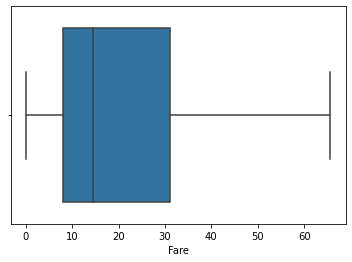

In [475]:
sns.boxplot(X['Fare'])

In [476]:
X.skew()  # fare skewness reduced.

Pclass   -0.630548
Age       0.491821
SibSp     3.695352
Parch     2.749117
Fare      1.082179
dtype: float64

In [477]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22.0,1,0,7.2500,S
2,1,female,38.0,1,0,65.6344,C
3,3,female,26.0,0,0,7.9250,S
4,1,female,35.0,1,0,53.1000,S
5,3,male,35.0,0,0,8.0500,S


In [478]:
X.shape

(891, 7)

In [479]:
Y.shape

(891, 1)

In [480]:
Y.value_counts()

Survived
0           549
1           342
dtype: int64

In [481]:
num= X.select_dtypes(np.number)
num

,Pclass,Age,SibSp,Parch,Fare
PassengerId,,,,,
1,3,22.0,1,0,7.2500
2,1,38.0,1,0,65.6344
3,3,26.0,0,0,7.9250
4,1,35.0,1,0,53.1000
5,3,35.0,0,0,8.0500
...,...,...,...,...,...
887,2,27.0,0,0,13.0000
888,1,19.0,0,0,30.0000
889,3,27.0,1,2,23.4500


# Standardization()

In [482]:
from sklearn.preprocessing import MinMaxScaler
mms= MinMaxScaler()
num_scaled=mms.fit_transform(num)
num_scaled

array([[1.        , 0.27117366, 0.125     , 0.        , 0.11046037],
       [0.        , 0.4722292 , 0.125     , 0.        , 1.        ],
       [1.        , 0.32143755, 0.        , 0.        , 0.12074461],
       ...,
       [1.        , 0.33400352, 0.125     , 0.33333333, 0.35728216],
       [0.        , 0.32143755, 0.        , 0.        , 0.45707739],
       [1.        , 0.39683338, 0.        , 0.        , 0.11807832]])

# Transformation()

In [483]:
# transformation to reduce skewness()

In [484]:
from sklearn.preprocessing import power_transform
num_transformed=power_transform(num_scaled)  # default=’yeo-johnson’
num_transformed

array([[ 0.86397329, -0.53634668,  1.31000171, -0.55983487, -1.02550711],
       [-1.45912855,  0.69754883,  1.31000171, -0.55983487,  1.59978035],
       [ 0.86397329, -0.21021318, -0.67588738, -0.55983487, -0.93988034],
       ...,
       [ 0.86397329, -0.13064695,  1.31000171,  1.88860914,  0.39978231],
       [-1.45912855, -0.21021318, -0.67588738, -0.55983487,  0.73266865],
       [ 0.86397329,  0.25610584, -0.67588738, -0.55983487, -0.96178106]])

In [485]:
num_transformed

array([[ 0.86397329, -0.53634668,  1.31000171, -0.55983487, -1.02550711],
       [-1.45912855,  0.69754883,  1.31000171, -0.55983487,  1.59978035],
       [ 0.86397329, -0.21021318, -0.67588738, -0.55983487, -0.93988034],
       ...,
       [ 0.86397329, -0.13064695,  1.31000171,  1.88860914,  0.39978231],
       [-1.45912855, -0.21021318, -0.67588738, -0.55983487,  0.73266865],
       [ 0.86397329,  0.25610584, -0.67588738, -0.55983487, -0.96178106]])

# Encoding

In [486]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')

In [487]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,3,male,22.0,1,0,7.2500,S
2,1,female,38.0,1,0,65.6344,C
3,3,female,26.0,0,0,7.9250,S
4,1,female,35.0,1,0,53.1000,S
5,3,male,35.0,0,0,8.0500,S


In [488]:
# Pclass is ordinal categorical column, Pclass 1 would have been preferred first for rescue than  pclass 3. all have different weitage here. 
#doing ont hot encoding here

# I would prefert one hot encoding if feature are not much

X=pd.get_dummies(X)


In [489]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,
1,3,22.0,1,0,7.2500,0,1,0,0,1
2,1,38.0,1,0,65.6344,1,0,1,0,0
3,3,26.0,0,0,7.9250,1,0,0,0,1
4,1,35.0,1,0,53.1000,1,0,0,0,1
5,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...
887,2,27.0,0,0,13.0000,0,1,0,0,1
888,1,19.0,0,0,30.0000,1,0,0,0,1
889,3,27.0,1,2,23.4500,1,0,0,0,1


In [490]:
Y.value_counts()

Survived
0           549
1           342
dtype: int64

<AxesSubplot:ylabel='None'>

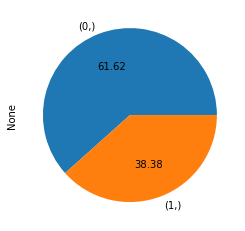

In [491]:
Y.value_counts().plot.pie(autopct='%.2f')

# Balanced the data  SMOTE


In [492]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()


In [493]:
X,Y= smt.fit_resample(X,Y)

In [494]:
X.shape

(1098, 10)

In [495]:
Y.shape

(1098, 1)

In [496]:
Y.value_counts()

Survived
0           549
1           549
dtype: int64

<AxesSubplot:ylabel='None'>

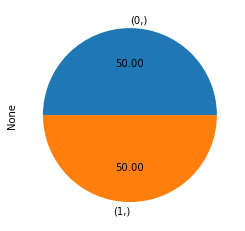

In [497]:
Y.value_counts().plot.pie(autopct='%.2f')

# Now, Data is balanced

In [498]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,65.6344,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [499]:
X.shape

(1098, 10)

In [500]:
Y.head()

,Survived
0,0
1,1
2,1
3,1
4,0


In [501]:
Y.shape

(1098, 1)

In [502]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [503]:
X.skew()

Pclass       -0.475772
Age           0.399716
SibSp         3.921089
Parch         2.799788
Fare          0.995003
Sex_female    0.460405
Sex_male     -0.238798
Embarked_C    1.765130
Embarked_Q    3.030079
Embarked_S   -0.815305
dtype: float64

# Transformation

In [504]:
from sklearn.preprocessing import power_transform
X_transformed=power_transform(X)   # default,  method='yeo-johnson'

X_transformed

array([[ 0.9276215 , -0.49412375,  1.44104809, ..., -0.45160532,
        -0.30061176,  0.67259271],
       [-1.39443982,  0.7171341 ,  1.44104809, ...,  2.21432288,
        -0.30061176, -1.48678388],
       [ 0.9276215 , -0.18073621, -0.66117294, ..., -0.45160532,
        -0.30061176,  0.67259271],
       ...,
       [-1.39443982,  1.40997372,  1.44104809, ..., -0.45160532,
        -0.30061176,  0.67259271],
       [ 0.9276215 , -0.17197526, -0.66117294, ..., -0.45160532,
        -0.30061176,  0.67259271],
       [ 0.9276215 , -0.10365654,  1.44104809, ..., -0.45160532,
        -0.30061176, -1.48678388]])

In [505]:
pd.DataFrame(X_transformed).skew()

0   -0.341617
1    0.047556
2    0.862554
3    1.230689
4   -0.001009
5    0.460405
6   -0.238798
7    1.765130
8    3.030079
9   -0.815305
dtype: float64

In [506]:
# it has removed skewness to some extent

# Standardization

In [507]:
from sklearn.preprocessing import StandardScaler
ss= StandardScaler()

In [508]:
X_scaled= ss.fit_transform(X_transformed)

In [509]:
X_scaled

array([[ 0.9276215 , -0.49412375,  1.44104809, ..., -0.45160532,
        -0.30061176,  0.67259271],
       [-1.39443982,  0.7171341 ,  1.44104809, ...,  2.21432288,
        -0.30061176, -1.48678388],
       [ 0.9276215 , -0.18073621, -0.66117294, ..., -0.45160532,
        -0.30061176,  0.67259271],
       ...,
       [-1.39443982,  1.40997372,  1.44104809, ..., -0.45160532,
        -0.30061176,  0.67259271],
       [ 0.9276215 , -0.17197526, -0.66117294, ..., -0.45160532,
        -0.30061176,  0.67259271],
       [ 0.9276215 , -0.10365654,  1.44104809, ..., -0.45160532,
        -0.30061176, -1.48678388]])

# Machine Learning

In [510]:
# train test split

In [511]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score

In [512]:
# find best random state
maxacc=0
maxi=0

for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(X_scaled,Y,random_state=i,test_size=.20)
    LR= LogisticRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    acc= accuracy_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxi=i
        
print("Best accuracy is ",maxacc, "on random state ",maxi)

Best accuracy is  0.8590909090909091 on random state  194


In [513]:
# We will us this Random state = 77

In [514]:
x_train,x_test,y_train,y_test= train_test_split(X_scaled,Y,random_state=77,test_size=.20)

# Logistic Regression

In [515]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [516]:
LR= LogisticRegression()
DT= DecisionTreeClassifier()
SV= SVC()
NB= GaussianNB()
KNN= KNeighborsClassifier()

In [517]:
models= [LR, DT,SV,NB,KNN]

In [518]:
for m in models:
    m.fit(x_train,y_train)
    pred= m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred))
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))
    print('*'*50)

Accuracy_Score of  LogisticRegression() is 0.8409090909090909
Confusion Matrix of  LogisticRegression()  is 
 [[105  21]
 [ 14  80]]
              precision    recall  f1-score   support

           0       0.88      0.83      0.86       126
           1       0.79      0.85      0.82        94

    accuracy                           0.84       220
   macro avg       0.84      0.84      0.84       220
weighted avg       0.84      0.84      0.84       220

**************************************************
Accuracy_Score of  DecisionTreeClassifier() is 0.8409090909090909
Confusion Matrix of  DecisionTreeClassifier()  is 
 [[108  18]
 [ 17  77]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       126
           1       0.81      0.82      0.81        94

    accuracy                           0.84       220
   macro avg       0.84      0.84      0.84       220
weighted avg       0.84      0.84      0.84       220

*********************

In [519]:
# From all , SVC is giving best accuracy 89%

# Lets try Ensemble technique

In [520]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [521]:
Random=RandomForestClassifier()
xgb= XGBClassifier()
lgb= LGBMClassifier()

In [522]:
model= [Random,xgb,lgb]

for m in model:
    m.fit(x_train,y_train)
    pred= m.predict(x_test)
    print('Accuracy_Score of ',m, 'is', accuracy_score(y_test,pred))
    print('Confusion Matrix of ',m,' is \n', confusion_matrix(y_test,pred) )
    print(classification_report(y_test,pred))
    print('*'*50)

Accuracy_Score of  RandomForestClassifier() is 0.8545454545454545
Confusion Matrix of  RandomForestClassifier()  is 
 [[108  18]
 [ 14  80]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       126
           1       0.82      0.85      0.83        94

    accuracy                           0.85       220
   macro avg       0.85      0.85      0.85       220
weighted avg       0.86      0.85      0.85       220

**************************************************
[08:58:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy_Score of  XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
   

# Voting classifier

In [523]:
from sklearn.ensemble import VotingClassifier
estimator=[]
estimator.append(('LR',LogisticRegression()))
estimator.append(('SVC', SVC()))
estimator.append(('DTC',DecisionTreeClassifier()))
estimator.append(('xgb',XGBClassifier()))
estimator.append(('lgb',LGBMClassifier()))

In [524]:
vot_hard= VotingClassifier(estimators=estimator, voting='hard')
vot_hard.fit(x_train,y_train)
vot_hard_predict=vot_hard.predict(x_test)
accuracy_score(y_test,vot_hard_predict)*100

[08:58:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


87.72727272727273

In [525]:
#Conclusion:
#    accuracy score:
#    SVM: 89 with least Fp and Fn
 #   Accuracy_Score of  KNeighborsClassifier() is 0.8818181818181818
 #   Voting Classifier    87.27

# Cross Validation()

In [526]:
# Lets cross check model

In [527]:
from sklearn.model_selection import cross_val_score

In [528]:

print("Cross validation for Logistic Regressor ", cross_val_score(LR,X,Y,cv=5).mean()*100)
print("Cross validation for Decision Tree ", cross_val_score(DT,X,Y,cv=5).mean()*100)
print("Cross validation for SV ", cross_val_score(SV,X,Y,cv=5).mean()*100)
print("Cross validation for NB ", cross_val_score(NB,X,Y,cv=5).mean()*100)
print("Cross validation for KNN ", cross_val_score(KNN,X,Y,cv=5).mean()*100)
print("Cross validation for XGB ", cross_val_score(xgb,X,Y,cv=5).mean()*100)
print("Cross validation for lgb ", cross_val_score(lgb,X,Y,cv=5).mean()*100)
print("Cross validation for Random ", cross_val_score(Random,X,Y,cv=5).mean()*100)


Cross validation for Logistic Regressor  79.51681195516812
Cross validation for Decision Tree  80.4296388542964
Cross validation for SV  66.12245745122458
Cross validation for NB  78.2420091324201
Cross validation for KNN  76.87463677874636
[08:58:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:58:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:58:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the defaul

In [529]:
# Difference:
#-  Accuracy  --  CV
# LR 85.9   - 79.97
#DT  84.54  - 80.06
# SV 89.09  - 67.21
#NB  83.18  -  76.96
#KNN  88.18  - 76.42
#xgb  86.81  - 84.07
#lgb  85.90  - 84.43
#Random  84.54  - 83.52

In [530]:
# Least difference and good accuracy score. I am selecting lgb for this

# Hypertune LGB

In [531]:
from sklearn.model_selection import GridSearchCV

In [532]:
param_grid = {
    
    'num_leaves': [31, 127],
    'reg_alpha': [0.1, 0.5,1,1.5],
    'min_data_in_leaf': [30, 50, 100, 300, 400],
    'lambda_l1': [0, 1, 1.5],
    'lambda_l2': [0, 1]
    }

In [533]:
GCV= GridSearchCV(lgb,param_grid,cv=5)
GCV.fit(x_train,y_train)

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf

[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=0, 

[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_

[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 

[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is s

[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 

[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf

[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set

[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_i

[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is s

[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=0.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is

[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=0, reg_alpha=1.5 will be ignored. Current value: lambda_l1=0
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is

[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set

[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set

[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=1.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=1.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1

[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 

[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set

[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 

[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is s

[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=1.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=1.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=1.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set

[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set

[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=1.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1, 

[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=1.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_i

[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 

[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=1.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 

[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=1.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=1.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1, reg_alpha=1.5 will be ignored. Current value: lambda_l1=1
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is

[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lamb

[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 

[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=1.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning

[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning

[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=1.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] la

[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning

[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=0, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lamb

[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_

[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda

[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=1.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=1.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=1.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=50, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=50
[LightGBM] [Warning] lamb

[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=100, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=100
[LightGBM] [Warning

[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=300, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=300
[LightGBM] [Warning] lamb

[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=0.5 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning

[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lambda_l1 is set=1.5, reg_alpha=1 will be ignored. Current value: lambda_l1=1.5
[LightGBM] [Warning] lambda_l2 is set=1, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1
[LightGBM] [Warning] min_data_in_leaf is set=400, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=400
[LightGBM] [Warning] lamb

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'lambda_l1': [0, 1, 1.5], 'lambda_l2': [0, 1],
                         'min_data_in_leaf': [30, 50, 100, 300, 400],
                         'num_leaves': [31, 127],
                         'reg_alpha': [0.1, 0.5, 1, 1.5]})

In [534]:
GCV.best_params_

{'lambda_l1': 1.5,
 'lambda_l2': 0,
 'min_data_in_leaf': 30,
 'num_leaves': 31,
 'reg_alpha': 0.1}

In [535]:
GCV_pred=GCV.best_estimator_.predict(x_test)

In [536]:
accuracy_score(y_test,GCV_pred)

0.8681818181818182

In [537]:
# after hypertuning, lil bit improved

# ROC AUC plot

In [538]:
from sklearn.metrics import roc_auc_score,roc_curve

In [539]:
from sklearn.metrics import plot_roc_curve

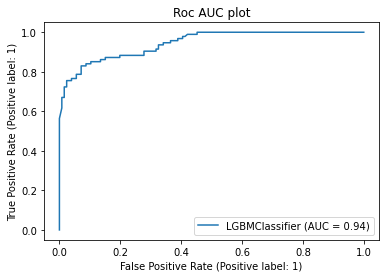

In [540]:
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title('Roc AUC plot')
plt.show()

In [541]:
#  Final accuracy is 88% and AUC score is 95%

# Save the file

In [542]:
import joblib

In [675]:
joblib.dump(   GCV.best_estimator_  ,'Titanic_Survival.pkl')

['Titanic_Survival.pkl']